In [1]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [7]:
# def load_top_fpr(predictions_file,proteins_only=True,fpr=0.05):
#     df_predictions = pd.read_csv(predictions_file, sep='\t')
#     fpr, tpr, thresholds = roc_curve(df_predictions['true_label'], df_predictions['predicted_score'])
#     threshold = thresholds[fpr <= 0.05][-1]
#     df_predictions = df_predictions[df_predictions['predicted_score'] >= threshold]
#     if proteins_only:
#         return set(df_predictions['protein'].values.tolist())
#     return df_predictions

def load_predictions(predictions_file):
    return set(pd.read_csv(predictions_file, sep='\t')['protein'].values.tolist())

def venn_diagram(sets_dict, title="Venn Diagram", equal_size=False):
    """
    Create a Venn diagram showing intersection sizes.
    
    Parameters:
    sets_dict: dictionary where keys are set names and values are sets of elements
    title: title for the diagram
    equal_size: if True, all circles will be the same size regardless of actual set sizes
    
    Example:
    sets = {
        'A': {1, 2, 3, 4, 5},
        'B': {3, 4, 5, 6, 7},
        'C': {5, 6, 7, 8, 9}  # optional third set
    }
    """
    
    set_names = list(sets_dict.keys())
    set_values = list(sets_dict.values())
    
    if len(set_names) == 2:
        # Two-set Venn diagram
        A, B = set_values[0], set_values[1]
        
        # Calculate intersection sizes
        only_A = len(A - B)
        only_B = len(B - A)
        both_AB = len(A & B)
        
        # Create the diagram
        fig, ax = plt.subplots(figsize=(5, 4))
        
        if equal_size:
            # Use normalized values (all 1) to make circles equal size
            venn = venn2(subsets=(1, 1, 1), set_labels=set_names, ax=ax)
        else:
            # Use actual sizes
            venn = venn2(subsets=(only_A, only_B, both_AB), 
                         set_labels=set_names, ax=ax)
        
        # Add size labels to each region
        if venn.get_label_by_id('10'):
            venn.get_label_by_id('10').set_text(str(only_A))
        if venn.get_label_by_id('01'):
            venn.get_label_by_id('01').set_text(str(only_B))
        if venn.get_label_by_id('11'):
            venn.get_label_by_id('11').set_text(str(both_AB))
            
    elif len(set_names) == 3:
        # Three-set Venn diagram
        A, B, C = set_values[0], set_values[1], set_values[2]
        
        # Calculate intersection sizes
        only_A = len(A - B - C)
        only_B = len(B - A - C)
        only_C = len(C - A - B)
        AB_only = len((A & B) - C)
        AC_only = len((A & C) - B)
        BC_only = len((B & C) - A)
        ABC_all = len(A & B & C)
        
        # Create the diagram
        fig, ax = plt.subplots(figsize=(10, 8))
        
        if equal_size:
            # Use normalized values (all 1) to make circles equal size
            venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=set_names, ax=ax)
        else:
            # Use actual sizes
            venn = venn3(subsets=(only_A, only_B, AB_only, only_C, AC_only, BC_only, ABC_all),
                         set_labels=set_names, ax=ax)
        
        # Add size labels to each region
        labels = {
            '100': only_A,    # A only
            '010': only_B,    # B only
            '001': only_C,    # C only
            '110': AB_only,   # A and B, not C
            '101': AC_only,   # A and C, not B
            '011': BC_only,   # B and C, not A
            '111': ABC_all    # A, B, and C
        }
        
        for region_id, size in labels.items():
            label = venn.get_label_by_id(region_id)
            if label:
                label.set_text(str(size))
    
    else:
        raise ValueError("Only 2 or 3 sets are supported")
    
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [3]:
df_inflammatome = pd.read_csv('../data/ranked_list_inflammatome.tsv', sep='\t').iloc[:2000,[5]]
df_inflammatome.columns = ['protein']
df_inflammatome['protein'] = '9606.' + df_inflammatome['protein']
inf_set = set(df_inflammatome['protein'].values)

In [8]:
# ad_set = load_top_fpr('../results/test_results/atopic_dermatitis/atopic_dermatitis_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
# uc_set = load_top_fpr('../results/test_results/ulcerative_colitis/ulcerative_colitis_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
ad_set = load_predictions('../results/test_results/atopic_dermatitis/atopic_dermatitis_fpr_0.05_prediction_results.tsv')
uc_set = load_predictions('../results/test_results/ulcerative_colitis/ulcerative_colitis_fpr_0.05_prediction_results.tsv')

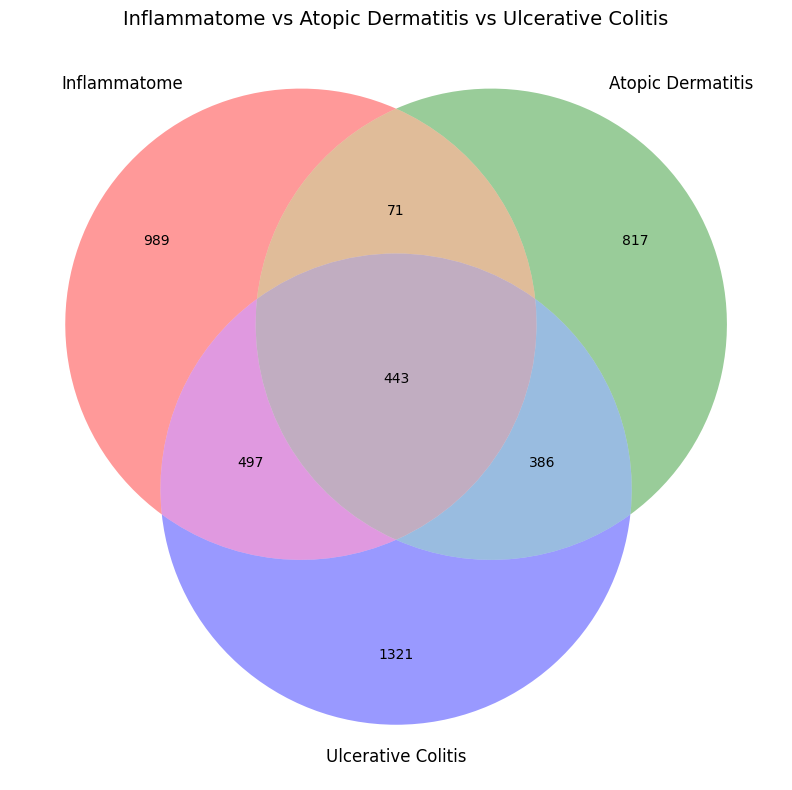

In [9]:
venn_diagram({
    'Inflammatome': inf_set,
    'Atopic Dermatitis': ad_set,
    'Ulcerative Colitis': uc_set
}, "Inflammatome vs Atopic Dermatitis vs Ulcerative Colitis", equal_size=True)

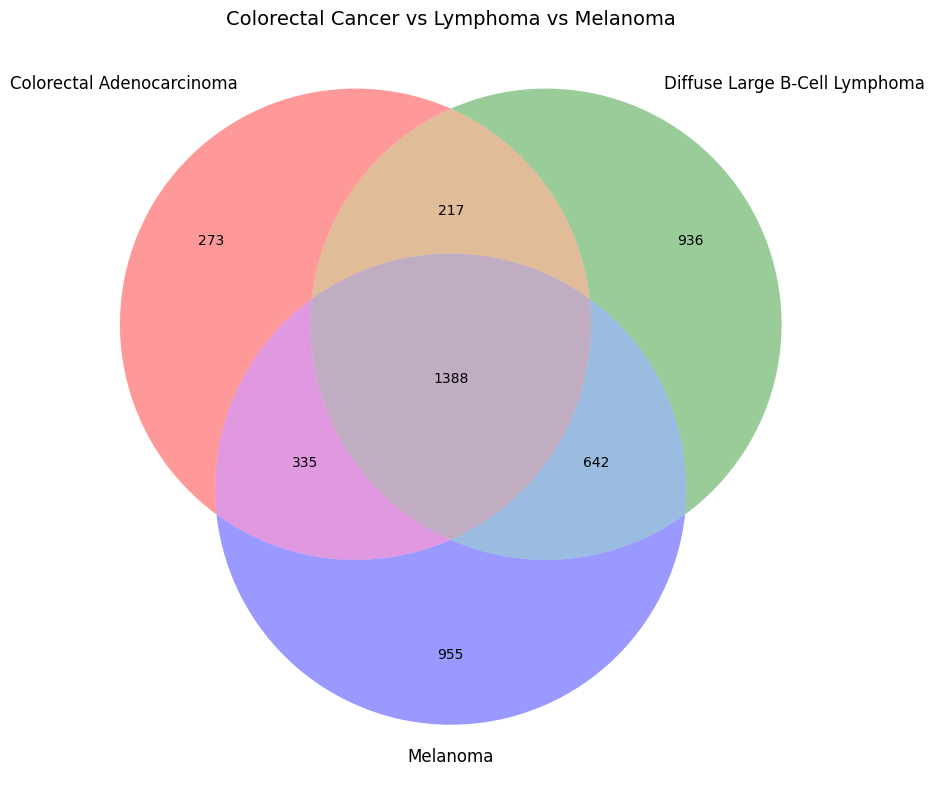

In [11]:
# col_set = load_top_fpr('../results/test_results/COADREAD/COADREAD_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
# lym_set = load_top_fpr('../results/test_results/DLBCLNOS/DLBCLNOS_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
# mel_set = load_top_fpr('../results/test_results/MEL/MEL_test_prediction_results.tsv', proteins_only=True, fpr=0.05)

col_set = load_predictions('../results/test_results/colorectal_adenocarcinoma/colorectal_adenocarcinoma_fpr_0.05_prediction_results.tsv')
lym_set = load_predictions('../results/test_results/diffuse_large_b-cell_lymphoma/diffuse_large_b-cell_lymphoma_fpr_0.05_prediction_results.tsv')
mel_set = load_predictions('../results/test_results/melanoma/melanoma_fpr_0.05_prediction_results.tsv')

venn_diagram({
    'Colorectal Adenocarcinoma': col_set,
    'Diffuse Large B-Cell Lymphoma': lym_set,
    'Melanoma': mel_set
}, "Colorectal Cancer vs Lymphoma vs Melanoma", equal_size=True)